In [2]:
#keras and tensorflow both are deep learning library
#tensorflow act as backened of keras for low-level API computation
#Kears is for high level computation(steps of keras: models,compilation,evaluation)



import tensorflow as tsf

#keras have two types models:(1)Sequential (2)Functional 
from tensorflow.keras import models

#in this dataset we apply convolutional neural network so we need conv layers
from tensorflow.keras import layers

#we import to_categorical because it convert our labels into categorical(0,1)
from tensorflow.keras.utils import to_categorical

#import dataset because it is already present in keras library
from tensorflow.keras.datasets import mnist

import numpy as np

#For data visualization
import matplotlib.pyplot as plt


In [3]:
#train_images(train inputs)    #test_images(test inputs)
#train_labels(train outputs)   #test_labels(test outputs)
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

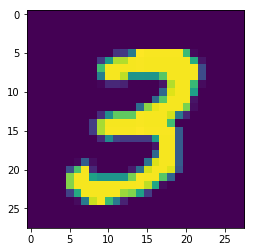

In [4]:
plt.imshow(train_images[7])

In [5]:
#(60000,28,28) 60000=total train input images, 28,28(pixels of images)

print(f"train images shape: {train_images.shape}")
print(f"train labels shape: {train_labels.shape}")
print(f"test images shape: {test_images.shape}")
print(f"test labels shape: {test_labels.shape}")

train images shape: (60000, 28, 28)
train labels shape: (60000,)
test images shape: (10000, 28, 28)
test labels shape: (10000,)


In [6]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
#it shows that at position 7, (3) present
train_labels[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
#instantiate model
model = models.Sequential()

#adding 1st convolution layer
#32= 32 filters/kernals  (3,3)=kernal/filter shape  
model.add(layers.Conv2D(32, (3,3),activation="relu",input_shape=(28,28,1)))
#adding 1st maxpooling
model.add(layers.MaxPooling2D((2,2)))

#adding 2nd convolution layer
model.add(layers.Conv2D(64,(3,3),activation="relu",padding="same"))
#adding 2nd maxpooling
model.add(layers.MaxPooling2D((2,2)))

#adding 3rd convolution layer
model.add(layers.Conv2D(32,(3,3),activation='relu'))

#flatting data into 1D tensor beacuse dense layer accepts data in 1Dtensor
model.add(layers.Flatten())

#adding Dense layer
model.add(layers.Dense(64,activation='relu'))

#output layer
#softmax activation function used beacuse multiclass output
model.add(layers.Dense(10,activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [10]:
# Reshape the Train Image Array for compatible with CNN
train_images = train_images.reshape((60000,28,28,1))

# Normalizing the Train Images
train_images = train_images.astype('float32')/255

# Reshape the Test Image Array for compatible with CNN
test_images = test_images.reshape((10000,28,28,1))

#Normalizing the test images
test_images = test_images.astype('float32')/255

In [11]:
#compiling the CNN model
model.compile(optimizer='rmsprop',loss="categorical_crossentropy",metrics=["accuracy"])

#fitting the model
model.fit(train_images,train_labels,epochs=5,batch_size=64)

#epochs(how many times the learning algorithm will work through enrire training dataset)
#batch_size(number of training examples utilized in one iteration)

Epoch 1/5
60000/60000 [==============================] - 48s 806us/sample - loss: 0.1722 - acc: 0.9466
Epoch 2/5
60000/60000 [==============================] - 35s 577us/sample - loss: 0.0473 - acc: 0.9853
Epoch 3/5
60000/60000 [==============================] - 34s 573us/sample - loss: 0.0335 - acc: 0.9898
Epoch 4/5
60000/60000 [==============================] - 35s 576us/sample - loss: 0.0259 - acc: 0.9920
Epoch 5/5
60000/60000 [==============================] - 35s 591us/sample - loss: 0.0201 - acc: 0.9936


In [12]:
#Evaluaate the CNN model
test_loss,test_accuracy = model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 7s 728us/sample - loss: 0.0292 - acc: 0.9920


In [13]:
test_accuracy 
#perfect

0.992